In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Data_set 2 - Copy.csv')

In [ ]:
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

In [ ]:
# Gender Distribution
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
Male      25
Female    15
Name: count, dtype: int64


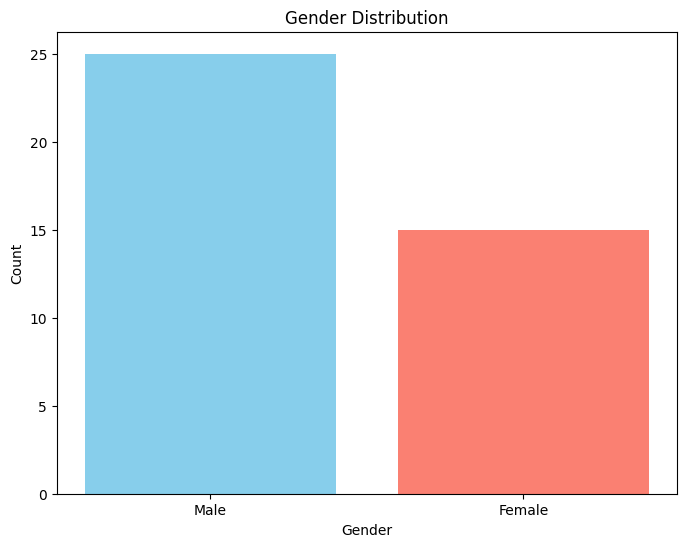

In [ ]:
# Plotting gender distribution
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

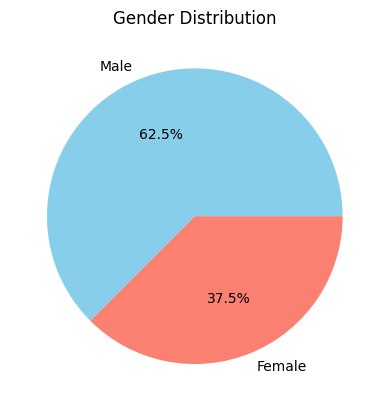

In [ ]:
# Plot pie chart
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.show()

In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(numerical_cols)


Numerical Columns:
Index(['age', 'Mutual_Funds', 'Equity_Market', 'Debentures',
       'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold'],
      dtype='object')


In [ ]:
# Calculate statistics
stats = df[numerical_cols].agg(['mean', 'median', 'std']).transpose()

In [ ]:
# Rename columns for clarity
stats.reset_index(inplace=True)
stats.columns = ['Column', 'Mean', 'Median', 'Standard Deviation']


In [ ]:
# Display the result
print(stats)

             Column    Mean  Median  Standard Deviation
0               age  27.800    27.0            3.560467
1      Mutual_Funds   2.550     2.0            1.197219
2     Equity_Market   3.475     4.0            1.131994
3        Debentures   5.750     6.5            1.675617
4  Government_Bonds   4.650     5.0            1.369072
5    Fixed_Deposits   3.575     3.5            1.795828
6               PPF   2.025     1.0            1.609069
7              Gold   5.975     6.0            1.143263


In [ ]:
# List of investment columns
investment_columns = [
    'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds',
    'Fixed_Deposits', 'PPF', 'Gold'
]


In [ ]:
# Define "preferred" as values >= 5 (you can adjust this threshold)
preferred_counts = (df[investment_columns] >= 5).sum().sort_values(ascending=False)

In [ ]:
# Display the result
print(preferred_counts)

Gold                36
Debentures          31
Government_Bonds    27
Fixed_Deposits      13
Equity_Market        5
PPF                  5
Mutual_Funds         3
dtype: int64


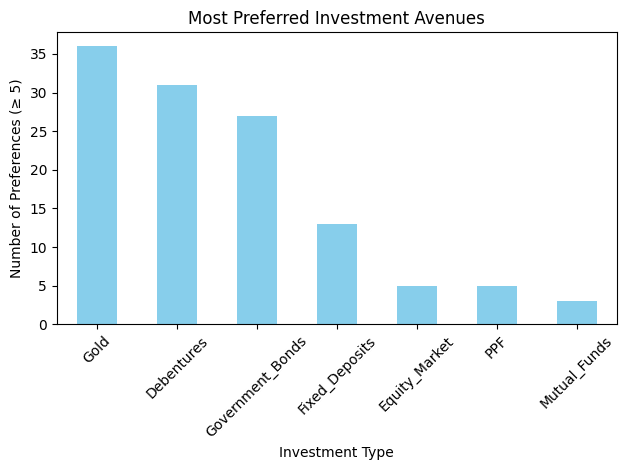

In [ ]:
# Bar chart
preferred_counts.plot(kind='bar', color='skyblue')
plt.title("Most Preferred Investment Avenues")
plt.xlabel("Investment Type")
plt.ylabel("Number of Preferences (≥ 5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Combine all reason-related columns into one
reason_columns = ['Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD']
all_reasons = df[reason_columns].fillna('').apply(lambda x: ' '.join(x), axis=1)

In [ ]:
# Convert to lowercase and remove punctuation
all_text = ''.join(all_reasons).lower()


In [ ]:
import re
from collections import Counter
words = re.findall(r'\b\w+\b', all_text)

In [ ]:
# Remove stopwords
stopwords = set([
    'the', 'and', 'is', 'in', 'of', 'to', 'for', 'with', 'a', 'on', 'by',
    'an', 'be', 'are', 'as', 'this', 'that', 'it', 'at', 'i', 'my', 'me'
])
filtered_words = [word for word in words if word not in stopwords and len(word) > 2]


In [ ]:
# Count most common words
word_freq = Counter(filtered_words).most_common(15)

In [ ]:
# Print the top reasons
print("Top common words or themes in investment reasons:")
for word, freq in word_freq:
    print(f"{word}: {freq}")

Top common words or themes in investment reasons:
returns: 51
appreciation: 30
assured: 26
better: 24
risk: 19
fixed: 18
freecapital: 16
safe: 13
investment: 13
fund: 13
diversification: 13
returnscapital: 10
returnsdividend: 7
tax: 4
high: 3


In [ ]:
# Extract the savings objectives column
savings_col = 'What are your savings objectives?'
savings_data = df[savings_col].dropna().astype(str).str.lower()


In [ ]:
# Combine all text into one string
all_savings_text = ' '.join(savings_data)

In [ ]:
# Clean text and extract words
words = re.findall(r'\b\w+\b', all_savings_text)

In [ ]:
#  Remove stopwords
stopwords = set([
    'the', 'and', 'is', 'in', 'of', 'to', 'for', 'with', 'a', 'on', 'by',
    'an', 'be', 'are', 'as', 'this', 'that', 'it', 'at', 'my', 'me', 'i'
])
filtered_words = [word for word in words if word not in stopwords and len(word) > 2]


In [ ]:
# Count common savings objectives
word_freq = Counter(filtered_words).most_common(15)


In [ ]:
# Display results
print("Top Savings Objectives Mentioned by Participants:")
for word, freq in word_freq:
    print(f"{word}: {freq}")

Top Savings Objectives Mentioned by Participants:
retirement: 24
plan: 24
health: 13
care: 13
education: 3


In [ ]:
# Extract the 'Source' column
sources = df['Source'].dropna().astype(str).str.lower()  # Convert to lowercase


In [ ]:
# Combine all text
all_sources_text = ' '.join(sources)

In [ ]:
# Count most common sources
source_counts = Counter(filtered_words).most_common(15)

In [ ]:
#  Display result
print("Most Common Sources of Investment Information:")
for word, count in source_counts:
    print(f"{word}: {count}")

Most Common Sources of Investment Information:
retirement: 24
plan: 24
health: 13
care: 13
education: 3


In [ ]:
#  View unique entries to understand format
print("Unique Duration values:")
print(df['Duration'].unique())


Unique Duration values:
['1-3 years' 'More than 5 years' '3-5 years' 'Less than 1 year']


In [ ]:
# Clean and convert Duration column
# Replace common words and keep only numeric values
df['Duration_clean'] = df['Duration'].astype(str).str.lower()
df['Duration_clean'] = df['Duration_clean'].str.replace(r'[^\d]', '', regex=True)


In [ ]:
# Convert to numeric, forcing errors to NaN
df['Duration_clean'] = pd.to_numeric(df['Duration_clean'], errors='coerce')


In [ ]:
# Calculate average duration
average_duration = df['Duration_clean'].mean()


In [ ]:
#  Display result
print(f"\nAverage Investment Duration: {average_duration:.2f} years")


Average Investment Duration: 22.65 years


In [ ]:
#  Extract the 'Expect' column and clean it
expectations = df['Expect'].dropna().astype(str).str.lower()


In [ ]:
#  Combine all expectations into one string
all_expectations_text = ' '.join(expectations)


In [ ]:
# Count most common words
expect_counts = Counter(filtered_words).most_common(15)

In [ ]:
# Display the most common expectations
print("Most Common Investment Expectations:")
for word, count in expect_counts:
    print(f"{word}: {count}")

Most Common Investment Expectations:
retirement: 24
plan: 24
health: 13
care: 13
education: 3


In [ ]:
#  Prepare relevant columns
# Clean numeric values from 'Duration' and 'Expect'
df['Duration_clean'] = df['Duration'].astype(str).str.extract('(\d+)').astype(float)
df['Expect_clean'] = df['Expect'].astype(str).str.extract('(\d+)').astype(float)

In [ ]:
# Select relevant numerical columns
correlation_df = df[['age', 'Duration_clean', 'Expect_clean']]


In [ ]:
# Drop missing values
correlation_df = correlation_df.dropna()

In [ ]:
# Correlation matrix
correlation_matrix = correlation_df.corr()

In [ ]:
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     age  Duration_clean  Expect_clean
age             1.000000       -0.036390     -0.089606
Duration_clean -0.036390        1.000000      0.200486
Expect_clean   -0.089606        0.200486      1.000000


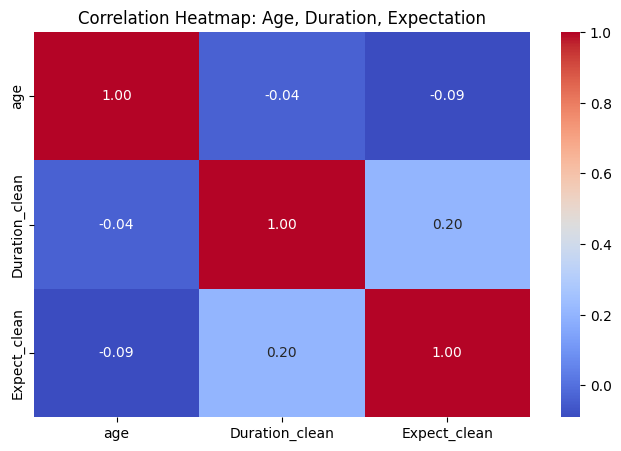

In [ ]:
import seaborn as sns
# Visualize correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Age, Duration, Expectation")
plt.show()


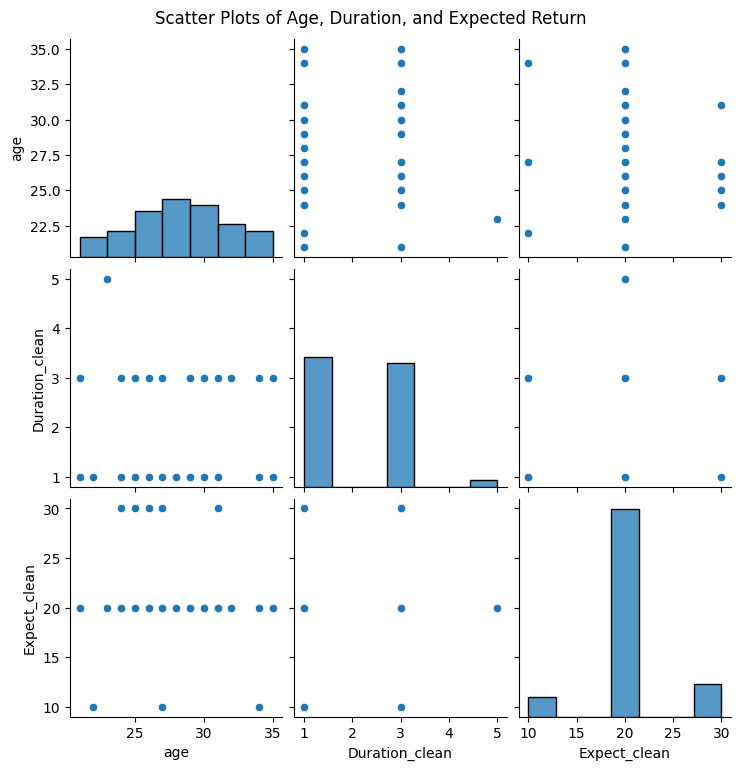

In [ ]:
# Scatter Plots
sns.pairplot(correlation_df)
plt.suptitle("Scatter Plots of Age, Duration, and Expected Return", y=1.02)
plt.show()